##Valuation and CVA of American Style Asian Options with Floating Strike Using Machine Learning (Least Square Monte Carlo Simulation)






In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
import sympy

###Part I: Monte Carlo Simulation of Geometric Brownian Motion (Underlying Equity Prices)

  For the purpose of this project, we use 52 periods per year (thus each period roughly corresponds to 1 week in real time), thus:

```
delta_t = 1 (week)
```
  For practicality, we use discretized Geometric Brownian Motion (GBM) to simulate the movement of the equity price
  
  

```
delta_S = S*(mu*delta_t+sigma*z*sqrt(delta_t))
```


In [0]:
"""This function will generate the simulated stock price for the length of the option"""

def Stock_Price_MC(s = 1.0, T = 52, sigma = 0.005, mu = 0.0, size = 1000):
    S = np.array([[0.0 for i in range(size)] for t in range(T)])
    S[0] = np.repeat(s, size)
    for t in range(T-1):
        # To faciliate LSM calculation we store prices by day
        S[t+1] = S[t] + S[t]*(mu + sigma*np.random.normal(0, 1, size = size))
    return S
  

###Part II: Payoff Matrix of American Style Vanilla Call/Put associated with the Underlying

This part produces a matrix that gives the payoff of immediate exercise at each period and for each simulated path

In [0]:
def Put_Payoff(Strike, Stock):
    s_m = np.array([[Strike for i in range(1000)] for t in range(len(Stock))])
    Payoff = np.array([[0.0 for i in range(1000)] for t in range(len(Stock))])
    for i in range(len(Stock)):
        Payoff[i] = np.maximum(s_m[i]-Stock[i], np.repeat(0, 1000))
    Payoff[0] = np.repeat(0, 1000)
    return Payoff

def Call_Payoff(Strike, Stock):
    s_m = np.array([[Strike for i in range(1000)] for t in range(len(Stock))])
    Payoff = np.array([[0.0 for i in range(1000)] for t in range(len(Stock))])
    for i in range(len(Stock)):
        Payoff[i] = np.maximum(Stock[i] - s_m[i], np.repeat(0, 1000))
    Payoff[0] = np.repeat(0, 1000)
    return Payoff
    

In [0]:
"""These parameters will be used in the valuation of the options"""

S = Stock_Price_MC()
P_Pay = Put_Payoff(Strike = 1, Stock = S)
C_Pay = Call_Payoff(Strike = 1, Stock = S)

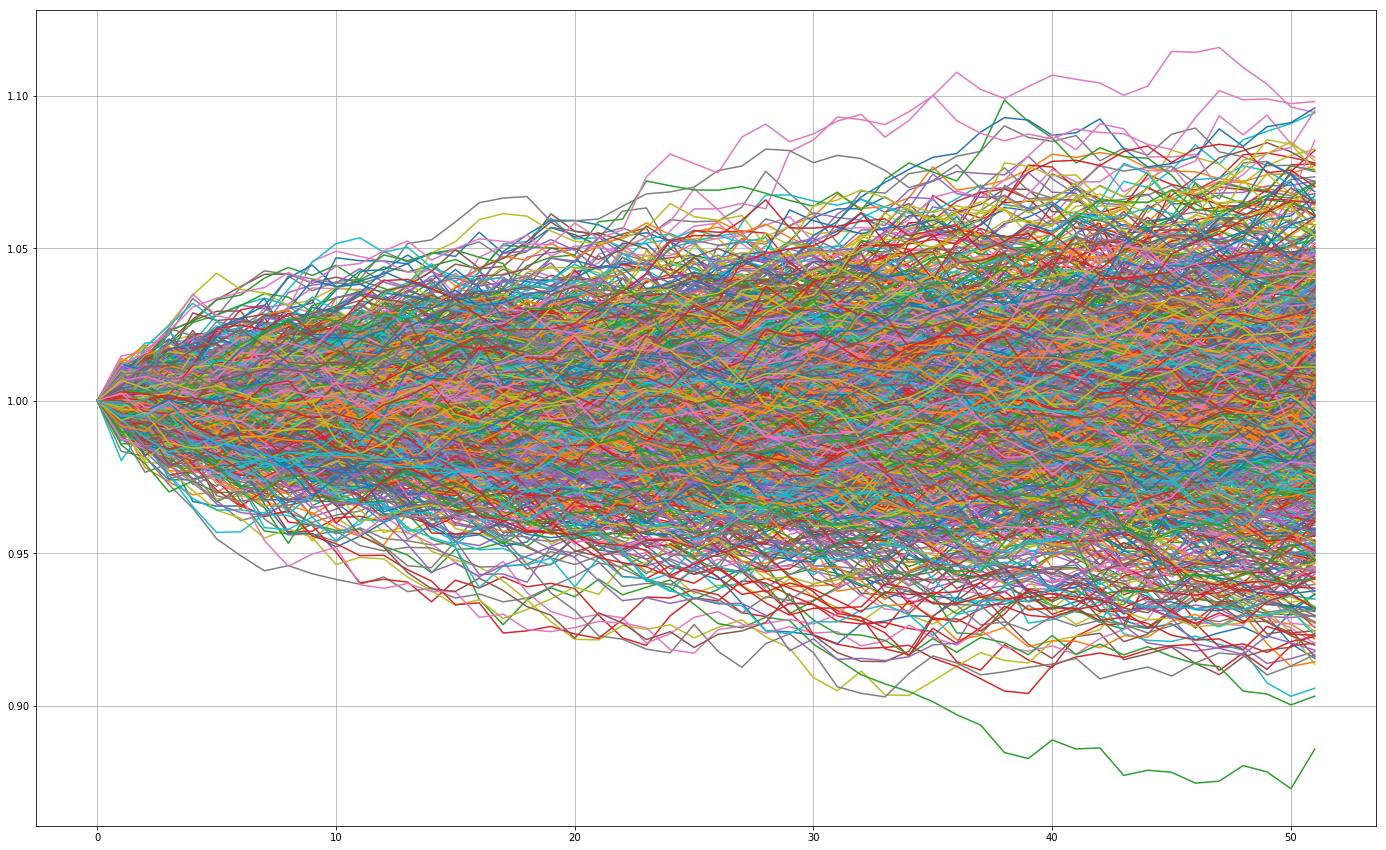

In [38]:
S_t = np.array([[0.0 for j in range(len(S))] for i in range(len(S[0]))])
x = np.arange(52)

for i in range(len(S[0])):
    for j in range(len(S)):
        S_t[i][j] = S[j][i]

plt.figure(figsize = (24, 15))
plt.grid()
for i in range(len(S_t)):
    plt.plot(x, S_t[i])

###Part III: Least Square Monte-Carlo Simulation in the Context of American Style Options

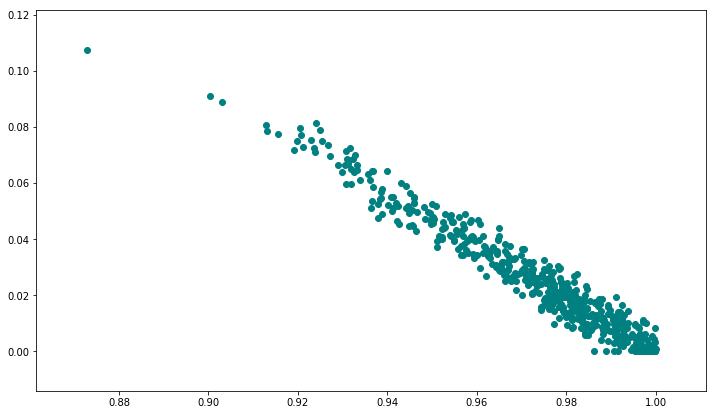

In [55]:
plt.figure(figsize = (12, 7))
plt.scatter(S[-2][S[-2] < 1], P_Pay[-1][S[-2] < 1]*0.94176, color = 'teal')
plt.show()
# plt.figure(figsize = (12, 7))
# plt.scatter(S[-2][S[-2] > 1], C_Pay[-1][S[-2] > 1]*0.94176, color = 'r')
# plt.show()

In [0]:
L2 = np.exp(-1/2 * S[-2])*(1-2*S[-2]+((S[-2])**2)/2)
L1 = np.exp(-1/2 * S[-2])*(1-S[-2])
L0 = np.exp(-1/2 * S[-2])

